# FOI requests data analysis

As of January 20, 2022, PST

In this notebook, we use the CSV file generated by the auto-scraper to make our analysis of FOI requests.

Remember that the **foi-ph-scraper** ideally scrapes new information from the website every Sunday of the week. The file generated is in a separate repository, which I will just read in here.

In [1]:
import pandas as pd
import re
import requests
from plotnine import *

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Read df and clean it

Read through the CSV, remove unnecessary columns, look for NaN values and duplicates, convert to datetime before you go through the data.

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 1000)
df = pd.read_csv('foi_final.csv')
df.tail(15)

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.


,Unnamed: 0,agency,date,title,status,purpose,period_covered,link,reason_denial
93940,93940,DOH,2022-01-20,REQUEST FOR booster SHOT CERTIFICATE,PENDING,TRAVEL ABROAD FOR FAMILY VISIT VISA,01/03/2022 - 01/03/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
93941,93941,DSWD,2022-01-20,SAP beneficiaries of San Roque Northern Samar,PENDING,Research on Good Governance,04/01/2020 - 12/31/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
93942,93942,DPWH,2022-01-20,ATTACHMENT FOR PCAB UPDATE CANNOT BE REPLACED,PENDING,FOR UPDATING OF BUSINESS INFORMATION,01/20/2022 - 01/20/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
93943,93943,SSS,2022-01-20,SSS sickness and EC benefits positive COVID-19,PENDING,Follow on SSS sickness application,09/24/2021 - 10/10/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
93944,93944,DTI,2022-01-20,The number of registered stores in Lucena City...,PENDING,Feasibility Study,01/20/2022 - 01/20/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
93945,93945,DOH,2022-01-20,Vaxcert Vaccine Certificate,PENDING,For travel back to Saudi Arabia,12/23/2021 - 01/20/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
93946,93946,ECC,2022-01-20,COVID CASH ASSISTANCE,PENDING,FOLLOW UP ON MY ONLINE COVID CASH ASSISTANCE,07/28/2020 - 08/17/2020,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
93947,93947,DOH,2022-01-20,Vaccination certificate,PENDING,I have no record of my 2nd dose vaccination in...,12/01/2021 - 01/05/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
93948,93948,DOH,2022-01-20,DOH Covid 19 Compensation Claim,PENDING,Follow up claim,05/01/2021 - 01/20/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
93949,93949,DOST-ASTI,2022-01-20,Daily Rainfall Data surrounding Mt. Banahaw fr...,PENDING,Research and Instruction,01/01/2010 - 12/31/2020,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN


## Convert to datetime

In [3]:
df.dtypes

Unnamed: 0         int64
agency            object
date              object
title             object
status            object
purpose           object
period_covered    object
link              object
reason_denial     object
dtype: object

In [4]:
df.date = pd.to_datetime(df.date)

In [5]:
df.dtypes

Unnamed: 0                 int64
agency                    object
date              datetime64[ns]
title                     object
status                    object
purpose                   object
period_covered            object
link                      object
reason_denial             object
dtype: object

## Remove 'Unnamed: 0' column

In [6]:
df = df.drop(["Unnamed: 0"], axis=1)
df

,agency,date,title,status,purpose,period_covered,link,reason_denial
0,DOTr,2016-11-25,clark green city update,CLOSED,for update,11/25/2016 - 11/25/2016,NaN,—
1,PCGG,2016-11-25,HIRING GOVERNMENT CAREER EMPLOYEES (RANK AND F...,DENIED,PUBLIC INFORMATION,11/25/2016 - 11/25/2016,NaN,—
2,PSA,2016-11-25,"The amount of yellowfin, skipjack, bigeye tuna...",DENIED,Research and Development,01/01/2010 - 12/31/2015,NaN,—
3,PSA,2016-11-25,Breakdown of Religious Affiliations of Filipin...,SUCCESSFUL,Research,01/01/1990 - 11/25/2016,NaN,—
4,PNP,2016-11-25,Crime Statatistics and Programs to Combat it,CLOSED,School Paper,01/01/2000 - 11/25/2016,NaN,—
...,...,...,...,...,...,...,...,...
93950,DENR EMB,2022-01-20,Pollution Rates Statistics of the Crematorium ...,PENDING,Research and Thesis Related Purposes.,01/01/2015 - 01/01/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
93951,MGB,2022-01-20,"Antipolo City, Rizal Historical Landslide Records",PENDING,Undergraduate Thesis,05/31/2015 - 12/31/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
93952,DA,2022-01-20,Goat and Carabao Dispersal San Roque Northern ...,PENDING,Research on Good Governance,01/01/2013 - 12/31/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
93953,DOH,2022-01-20,Floor plan of Quirino Memorial Medical Center,PENDING,Academic Case Study,01/20/2022 - 01/20/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN


## Looking into the NaNs

We look for null values and whether they account for significant number of the data.

In [7]:
df.isna().sum()

agency                0
date                  0
title                 2
status                0
purpose               1
period_covered        0
link              91580
reason_denial      2375
dtype: int64

Interpretation: The **link** column have over 91,000 null values. This is because a large part of the data in our df came from an existing CSV maintained by the government. The same goes for **reason_denial.**

You can find the CSV here: https://docs.google.com/spreadsheets/d/1kblO1_-gL65qXu_EJJBvc59UUHBQ7K3c/edit?fbclid=IwAR332h3xXbevTcnDiKQwKWldsod3kPP3J0T9_5NSXALgFI7XZPyIxMuqXg0#gid=875187444

The data is updated quarterly. We merged this data early on with the scraped data from the website.

## Analysis

Now that we have all the requests contained in one file, we can now analyze them, still using pandas.

## How much of the requests are granted or denied?

In [8]:
df.status.value_counts(normalize=True) * 100

SUCCESSFUL                42.498004
DENIED                    27.238572
PENDING                    9.897291
PARTIALLY SUCCESSFUL       7.661114
ACCEPTED                   4.215848
CLOSED                     3.720930
AWAITING CLARIFICATION     2.400085
REFERRED                   1.370869
PROCESSING                 0.995157
EXTENDED                   0.002129
Name: status, dtype: float64

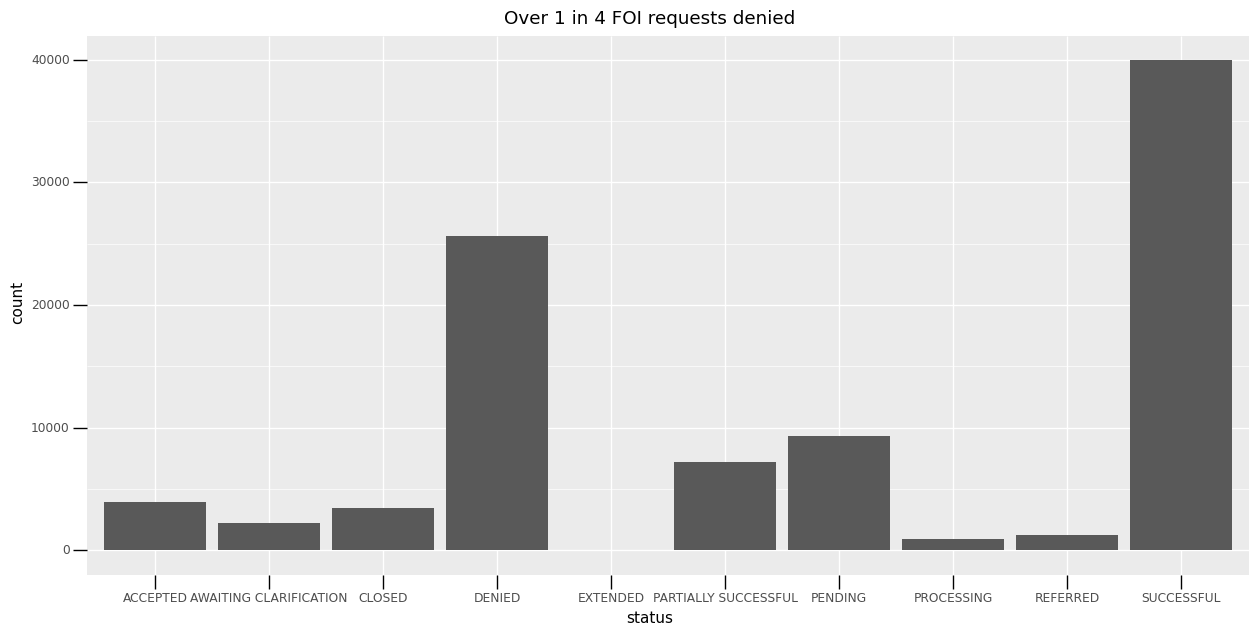

<ggplot: (302602772)>

In [9]:
(
    ggplot(df) + 
    geom_bar(aes(x="status")) + 
    theme(figure_size=(15,7), axis_ticks_length=10) + 
    labs(title="Over 1 in 4 FOI requests denied")
)

Note: We are still seeking clarification from PCOO on what **CLOSED** means. Meanwhile, over one in four FOI requests are denied by agencies. Over half are **successful** or **partially sucessful**. 

## Which agencies get the most FOI requests?

In [10]:
df.agency.value_counts().head(10)

DOH      6287
PSA      5688
DOLE     5199
SSS      4162
OWWA     3978
DepEd    3767
BIR      3718
DSWD     3606
NTC      2813
DPWH     2460
Name: agency, dtype: int64

The Department of Health, Philippine Statistics Authority and the labor department get the most requests.

## Which agencies deny the most requests?

The Bureau of Internal Revenue tops the list, although a deeper probe would show most of the denials were a result of requests for personal tax records, which are not for public consumption.

In [11]:
df[df.status=="DENIED"].agency.value_counts().head(10)

BIR     2385
DSWD    2262
DENR    1282
DOH     1066
DTI     1055
DOLE     828
DOTr     782
HDMF     660
DILG     599
SSS      515
Name: agency, dtype: int64

# Drilling down on specific agencies and requests

We select a few agencies and search in their request files some of the most common requests by **title** as well as some of the most denials. 

## DOH: Vaccination certificates

In [12]:
df[df.agency=="DOH"].title.value_counts().head(20)

Vaccination Certificate                                                                         144
Vaxcert                                                                                          56
VaxCert                                                                                          42
Vaccine Certificate                                                                              41
Vaccination certificate                                                                          35
Vax Cert                                                                                         28
Swab test result                                                                                 22
VAXCERT                                                                                          21
VACCINATION CERTIFICATE                                                                          17
Annual Hospital Statistical Report                                                               17


In [13]:
vax = ["Vaccination Certificate", "Vaxcert", "VaxCert", "Vaccination certificate", "Vax Cert", "VAXCERT", "VAX CERT", "Vax Certificate", "Vax certificate", "VACCINATION CERTIFICATE", "Vax cert", "VaxCertPH", "Vax Cert PH", "vax cert", "Vax cert request", "Vax Cert Request", "Vaccination Card", "Vax card", "vaccination card", "Vaccine certificate", "vaccine certificate"]
df_vax = df[df['title'].isin(vax)]
df_vax.head(10)

,agency,date,title,status,purpose,period_covered,link,reason_denial
84669,DOH,2021-11-15,Vax Cert,SUCCESSFUL,Travel,11/23/0201 - 11/26/0201,NaN,—
84837,DOH,2021-11-15,Vaccination Certificate,SUCCESSFUL,Travel purpose,11/15/2021 - 11/15/2021,NaN,—
84911,DOH,2021-11-16,VaxCertPH,SUCCESSFUL,Follow-Up on VaxCertPH,11/01/2021 - 11/16/2021,NaN,—
84924,DOH,2021-11-16,VaxCert,SUCCESSFUL,Travel,11/03/2021 - 11/16/2021,NaN,—
84970,DOH,2021-11-16,VAX CERT,SUCCESSFUL,Requirement for work and travel,11/16/2021 - 11/16/2021,NaN,—
85115,DOH,2021-11-16,VaxCert,SUCCESSFUL,for travel purpose,11/16/2021 - 11/16/2021,NaN,—
85166,DOH,2021-11-17,VAXCERT,SUCCESSFUL,FOLLOW UP VAXCERT.,11/01/2021 - 11/17/2021,NaN,—
85317,DOH,2021-11-17,Vaccination Certificate,SUCCESSFUL,Need of Vax cert for travel,05/31/2021 - 11/17/2021,NaN,—
85347,DOH,2021-11-18,Vaccination Certificate,SUCCESSFUL,Vaccination certificate for International travels,07/13/2021 - 08/31/2021,NaN,—
85365,DOH,2021-11-18,Vaccination Certificate,SUCCESSFUL,Travel Purposes,03/08/2021 - 04/08/2021,NaN,—


Interpretation: Nearly 30% of DOH requests from 2016 were to request for vaccination certificates.

## DSWD: Social amelioration program

This is the P275-billion pandemic relief program by the government in 2020 that gave dole outs to poor families. The program were given in two tranches and were marred by significant delays and other irregularities.

In [14]:
sap = ["SAP", "SAP 2nd tranche", "Sap 2nd tranche", "Social Amelioration Program", "Social amelioration program", "sap 2nd tranche", "SAP 2nd tranche", "2nd tranche", "DSWD SAP", "SAP 2ND TRANCHE", "Sap 2nd Tranche", "SAP 1st tranche", "SAP first tranche", "SAP 1ST TRANCHE", "Sap"]
df_sap = df[df['title'].isin(sap)]
df_sap[df_sap.status=="DENIED"].head(10)

,agency,date,title,status,purpose,period_covered,link,reason_denial
28381,DSWD,2020-04-09,Social amelioration program,DENIED,Personal information only,04/09/2020 - 04/09/2020,NaN,—
28995,DSWD,2020-04-21,Social Amelioration Program,DENIED,Transparency purposes to my kabarangay,04/01/2020 - 04/21/2020,NaN,—
29014,DSWD,2020-04-21,Sap,DENIED,Solo parent,04/08/2020 - 04/21/2020,NaN,—
29209,DSWD,2020-04-23,Social Amelioration Program,DENIED,Validation and Confirmation,04/23/2020 - 04/23/2020,NaN,—
29304,DSWD,2020-04-25,Social Amelioration Program,DENIED,To known the list of beneficiaries of Social A...,03/01/2020 - 04/25/2020,NaN,—
29437,DSWD,2020-04-27,DSWD SAP,DENIED,To know the status of DSWD SAP in our Barangay.,04/27/2020 - 04/27/2020,NaN,—
29446,DSWD,2020-04-27,Social Amelioration Program,DENIED,Transparency,04/19/2020 - 04/27/2020,NaN,—
29682,DSWD,2020-05-01,Social Amelioration Program,DENIED,Social Amelioration Program,03/16/2020 - 04/30/2020,NaN,incomplete-request
29686,DSWD,2020-05-01,SAP,DENIED,SAP APPLICATION,05/01/2020 - 05/01/2020,NaN,—
29849,DSWD,2020-05-03,Sap,DENIED,Applying for special amelioration program,03/21/2020 - 04/21/2020,NaN,—


Interpretation: Most requests for SAP were denied and were deemed an "invalid request."

## OVP: Any type of "assistance"

The office is known for its **Angat Buhay** program that helps the poor.

In [15]:
df[df.agency=="OVP"].title.str.contains("assistance", regex=False, case=False).value_counts()

False    355
True     259
Name: title, dtype: int64

Interpretation: Nearly three in four OVP FOI requests mention some form of "assistance".

## BIR: Tax identification number or TIN

Tax matters are generally protected by privacy laws in the Philippines. But that did not stop some people to request for them through FOI.

In [16]:
#df_final[df_final.title=="Income Tax Return"]
tax = ['Income Tax Return', 'ITR','BIR 2316', 'TIN Verification', 'TIN VERIFICATION', 'BIR Form 2316', 'Income tax return', 'TIN', 'INCOME TAX RETURN', 'Form 2316', 'TIN NUMBER', 'tin number', 'TIN verification']
df_tax = df[df['title'].isin(tax)]
df_tax.head(7)

,agency,date,title,status,purpose,period_covered,link,reason_denial
11002,BIR,2019-03-03,tin number,SUCCESSFUL,employment,03/03/2007 - 03/03/2010,NaN,—
11201,BIR,2019-03-07,TIN,SUCCESSFUL,Lot sale,01/01/2005 - 03/07/2019,NaN,—
13645,BIR,2019-06-12,TIN,SUCCESSFUL,Opening of Bank account,06/12/2019 - 06/12/2019,NaN,—
18001,BIR,2019-09-26,TIN,SUCCESSFUL,For issuance of tin ID,03/29/2019 - 06/22/2019,NaN,—
18992,BIR,2019-10-11,tin number,DENIED,employment,09/05/2019 - 10/10/2019,NaN,incomplete-request
21919,BIR,2019-11-29,BIR 2316,PARTIALLY SUCCESSFUL,BANK LOAN,01/01/2018 - 12/31/2018,NaN,—
22750,BIR,2019-12-26,TIN,DENIED,For verification,07/26/2019 - 12/26/2019,NaN,—


In [17]:
df_tax.status.value_counts(normalize=True) *100

DENIED                    51.574376
AWAITING CLARIFICATION    35.287731
SUCCESSFUL                 6.406080
ACCEPTED                   2.171553
PARTIALLY SUCCESSFUL       1.737242
PENDING                    1.085776
CLOSED                     0.868621
REFERRED                   0.542888
PROCESSING                 0.325733
Name: status, dtype: float64

# By topic

## Duterte's drug war

# Know each agencies' performance 

Just changed the name of the agency in brackets.

In [18]:
df[df.agency=="OP"].groupby('status').title.count()
#There were a lot of requests for TIN or tax identification number.

status
PENDING    19
Name: title, dtype: int64

## Top reasons for denial

Applicable only to data as of December 2021.

In [19]:
df.reason_denial.value_counts(dropna=False)
#"-" means it's not applicable since the request was not denied.

—                               77998
wrong-agency                     7043
incomplete-request               2789
NaN                              2375
invalid-request                  2107
information-available-online     1640
exceptions                          2
privacy                             1
Name: reason_denial, dtype: int64

# SALN requests, anyone?

Stands for "Statements of Assets, Liabilities and Net Worth" filed by public officials every year.

In [20]:
df.title.str.contains("SALN", regex=False, case=False).value_counts()

False    93751
True       202
Name: title, dtype: int64

Over 200 requests using the exact words "SALN" on the FOI portal. Below, we use a regex pattern to screen this more.

In [21]:
df.title.str.extractall(r'(.*\SALN.+)', re.IGNORECASE).count()
#223 requests mentioning SALN.

0    223
dtype: int64

In [22]:
df[df.agency=="OVP"].title.str.extractall(r'(.*\SALN.+)', re.IGNORECASE).value_counts().sum()
#39 requests for the SALN of the Vice President.

39

## Track request numbers through time

### By month

In [42]:
month_query = df.resample('M', on='date').title.count().to_frame().reset_index()
month_query.head()

,date,title
0,2016-11-30,117
1,2016-12-31,220
2,2017-01-31,93
3,2017-02-28,127
4,2017-03-31,225


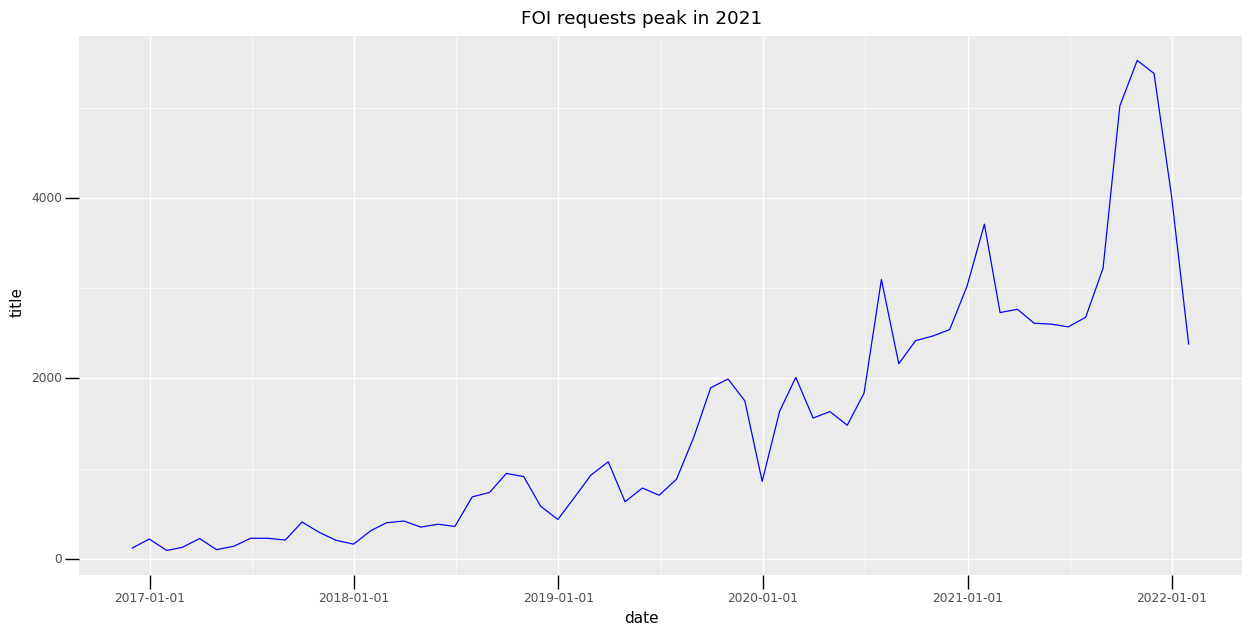

<ggplot: (303290633)>

In [47]:
(
    ggplot(month_query, aes(x="date", y="title")) + 
    geom_line(color="blue", stat="identity") + 
    theme(figure_size=(15,7), axis_ticks_length=10) + 
    labs(title="FOI requests peak in 2021")
)

In [24]:
df.resample('M', on='date').title.count().sort_values(ascending=False).head(10)
#Largest number of FOI requests recorded in December 2021.

date
2021-10-31    5526
2021-11-30    5382
2021-09-30    5023
2021-12-31    4037
2021-01-31    3711
2021-08-31    3223
2020-07-31    3097
2020-12-31    3024
2021-03-31    2767
2021-02-28    2731
Name: title, dtype: int64

### By year

In [32]:
year_query = df.resample('A', on='date').title.count().to_frame().reset_index()
year_query

,date,title
0,2016-12-31,337
1,2017-12-31,2418
2,2018-12-31,6530
3,2019-12-31,13554
4,2020-12-31,25874
5,2021-12-31,42865
6,2022-12-31,2375


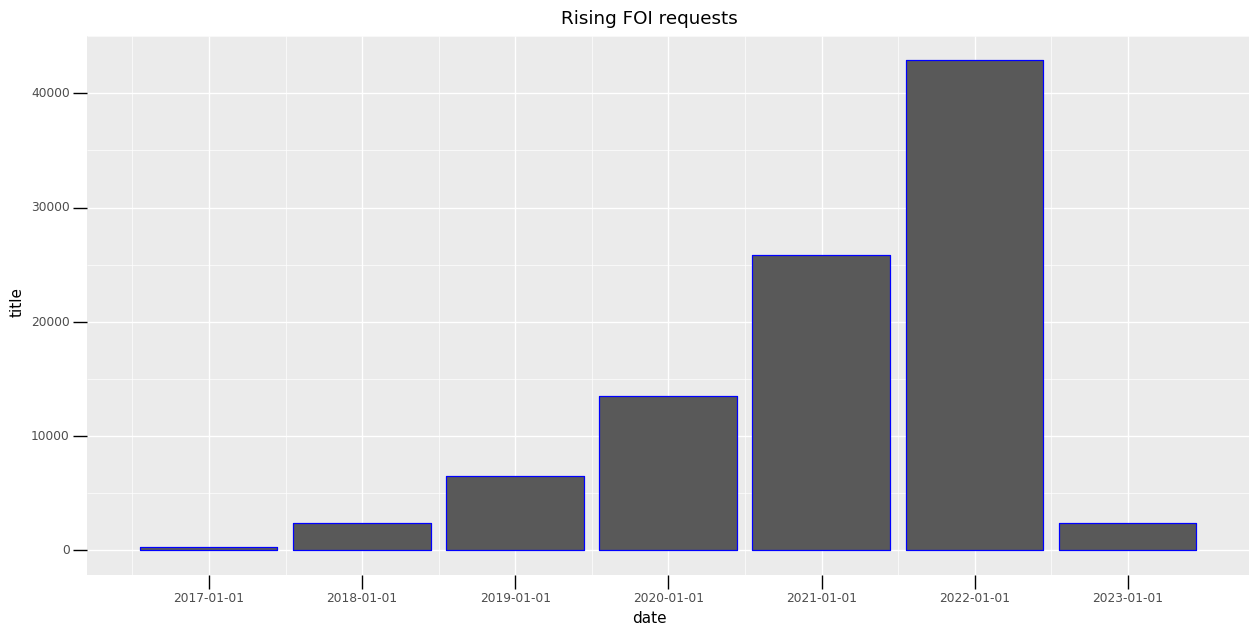

<ggplot: (303161384)>

In [39]:
(
    ggplot(year_query, aes(x="date", y="title")) + 
    geom_col(color="blue") + 
    theme(figure_size=(15,7), axis_ticks_length=10) + 
    labs(title="Rising FOI requests")
)

## Year-on-year change shows slowing down increase in FOI requests

In [40]:
df.resample('A', on='date').title.count().pct_change() * 100
#2016 started in September. 2022 as of few weeks of January.

date
2016-12-31           NaN
2017-12-31    617.507418
2018-12-31    170.057899
2019-12-31    107.565084
2020-12-31     90.895677
2021-12-31     65.668238
2022-12-31    -94.459349
Freq: A-DEC, Name: title, dtype: float64

# End.